In [3]:
%load_ext autoreload
%autoreload 2

import nnfabrik
from nnfabrik import builder

import os
import torch
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dataset_fn = 'nnvision.datasets.monkey_loaders.monkey_static_loader'
dataset_config = {'dataset': 'CSRF_V4',
  'neuronal_data_files': ['/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3645713184967.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646146362280.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646222772876.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646321567215.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646401671909.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646657276979.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646747773987.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646924284383.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647439534447.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647531807425.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647617982355.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648051669051.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648221742562.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648475457626.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648644839726.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649169411059.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649252123347.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649689088057.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649771255234.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650037309346.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650459721914.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3651417046988.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652197206019.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652885366025.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653061170515.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653226873615.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653320713405.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653578665399.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653924870701.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654009687031.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654087847388.pickle'],
  'image_cache_path': '/data/monkey/toliaslab/CSRF19_V4/images/individual/',
  'crop': [(68, 0), (126, 126)],
  'subsample': 1,
  'scale': 0.4,
  'seed': 1000,
  'batch_size': 64,
  'time_bins_sum': (3, 4, 5, 6, 7, 8, 9, 10, 11)}

In [5]:
dataloaders = builder.get_data(dataset_fn, dataset_config)

## Dataloaders

NNfabrik expects dataloaders to be nested dictionarys with actual PyTorch DataLoader Objects at the second Tier. The First Tier will be "train", "validation", and "test". The second Tier will be "session_key": DataLoader. So each dataset is either comprised of one or multiple sessions, with a session ID as the dictionary key to its dataloader.
Let's have a look:

In [10]:
dataloaders

{'train': {'3645713184967': <torch.utils.data.dataloader.DataLoader at 0x7f60295dde80>,
  '3646146362280': <torch.utils.data.dataloader.DataLoader at 0x7f5f658f2760>,
  '3646222772876': <torch.utils.data.dataloader.DataLoader at 0x7f5f658f9580>,
  '3646321567215': <torch.utils.data.dataloader.DataLoader at 0x7f5f658fb460>,
  '3646401671909': <torch.utils.data.dataloader.DataLoader at 0x7f5f658ff310>,
  '3646657276979': <torch.utils.data.dataloader.DataLoader at 0x7f5f659041f0>,
  '3646747773987': <torch.utils.data.dataloader.DataLoader at 0x7f5f659050d0>,
  '3646924284383': <torch.utils.data.dataloader.DataLoader at 0x7f5f65905550>,
  '3647439534447': <torch.utils.data.dataloader.DataLoader at 0x7f5f6590bf10>,
  '3647531807425': <torch.utils.data.dataloader.DataLoader at 0x7f5f65908df0>,
  '3647617982355': <torch.utils.data.dataloader.DataLoader at 0x7f5f65912cd0>,
  '3648051669051': <torch.utils.data.dataloader.DataLoader at 0x7f5f65898b50>,
  '3648221742562': <torch.utils.data.datalo

In [11]:
data_key = list(dataloaders["train"].keys())[0]

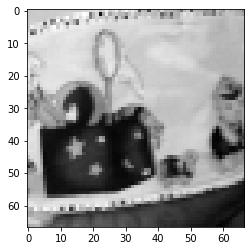

In [14]:
# here's a random image. The images are cropped to be 20x20, so it trains fast for demo purposes.
some_image = dataloaders["train"][data_key].dataset[:].inputs[0,0,::].cpu().numpy()
plt.imshow(some_image, cmap='gray')

In [15]:
dataloader = dataloaders["train"][data_key]

In [16]:
inputs, targets = next(iter(dataloader))
print("image_dimensions:", inputs.shape)
print("number of neurons of that session: ", targets.shape)

image_dimensions: torch.Size([64, 1, 67, 67])
number of neurons of that session:  torch.Size([64, 14])


In [18]:
# input image dimension
input_shape = dataloaders["train"][data_key].dataset[:].inputs.shape
print(input_shape)
# total images = 16064
# dims: N x C x W x H

torch.Size([11951, 1, 67, 67])


## Model Building

Models are built using the neuralpredictors repo from sinzlab. They consist of a convolutional core (with a user-specified number of layers), and a readout (spatial transformer readout, described in Sinz et al, 2018, NeurIPS).

### Building a model

#### the best data driven monkey model

In [24]:
model_fn = 'nnvision.models.se_core_full_gauss_readout'
model_config = {'pad_input': False,
  'gauss_type': 'isotropic',
  'gamma_readout': 0.43,
  'gamma_input': 10,
  'layers': 6,
  'depth_separable': True,
  'n_se_blocks': 0,
  'stack': -1,
  'input_kern': 15,
  'hidden_kern': 9,
  'hidden_channels': 32,
  'init_mu_range': 0.1780563002765732,
  'init_sigma': 0.5851238789405838}


model = builder.get_model(model_fn, model_config, dataloaders=dataloaders,seed=1000)
print(model)

Encoder(
  (core): SE2dCore(
    (_input_weights_regularizer): LaplaceL2norm(
      (laplace): Laplace()
    )
    (features): Sequential(
      (layer0): Sequential(
        (conv): Conv2d(1, 32, kernel_size=(15, 15), stride=(1, 1), bias=False)
        (norm): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (layer1): Sequential(
        (ds_conv): DepthSeparableConv2d(
          (in_depth_conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (spatial_conv): Conv2d(32, 32, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), groups=32, bias=False)
          (out_depth_conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (norm): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (layer2): Sequential(
        (ds_conv): DepthSeparableConv2d(
          

### the best mouse model with attention core (from the hyper search of a few weeks ago)

In [28]:
model_fn = 'nndichromacy.models.se_core_full_gauss_readout'
model_config = {'pad_input': False,
   'stack': -1,
   'input_kern': 9,
   'hidden_dilation': 1,
   'n_se_blocks': 0,
   'depth_separable': False,
   'attention_conv': True,
   'share_features': False,
   'share_grid': False,
   'init_sigma': 0.1,
   'init_mu_range': 0.3,
   'gauss_type': 'full',
   'gamma_readout': 0.012060713874543235,
   'gamma_input': 0.1679565228206452,
   'hidden_kern': 3,
   'layers': 4,
   'hidden_channels': 64}

In [30]:
model = builder.get_model(model_fn, model_config, dataloaders=dataloaders,seed=1000)
print(model)

Encoder(
  (core): SE2dCore(
    (_input_weights_regularizer): LaplaceL2norm(
      (laplace): Laplace()
    )
    (features): Sequential(
      (layer0): Sequential(
        (conv): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), bias=False)
        (norm): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (layer1): Sequential(
        (conv): AttentionConv(
          (key_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (query_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (value_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (norm): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (layer2): Sequential(
        (conv): AttentionConv(
          (key_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1)

In [31]:
trainer_fn = 'nnvision.training.trainers.nnvision_trainer'
trainer_config = {'stop_function': 'get_poisson_loss',
                   'maximize': False,
                   'avg_loss': False,
                   'device': 'cuda',
                   'max_iter': 100,
                   'lr_init': 0.005,
                   'lr_decay_steps': 4,
                   'patience': 3,
                   'verbose': True,
                 }
trainer = builder.get_trainer(trainer_fn, trainer_config)

In [32]:
out = trainer(model, dataloaders, seed=987654321)

Epoch 1:   2%|▏         | 143/6665 [00:49<37:22,  2.91it/s]


KeyboardInterrupt: 